In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
print("Customers Overview")
print(customers.info(), "\n")

Customers Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None 



In [5]:
print("Products Overview")
print(products.info(), "\n")

Products Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 



In [6]:
print("Transactions Overview")
print(transactions.info(), "\n")


Transactions Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None 



In [7]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


In [9]:
#top 5 products by sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Sales:\n", top_products)

Top 5 Products by Sales:
 ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [10]:
# 2. Customer distribution by region
region_distribution = customers['Region'].value_counts()
print("Customer Distribution by Region:\n", region_distribution)

Customer Distribution by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [11]:
# 3. Monthly sales trends
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('MonthYear')['TotalValue'].sum()
print("Monthly Sales Trends:\n", monthly_sales)


Monthly Sales Trends:
 MonthYear
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


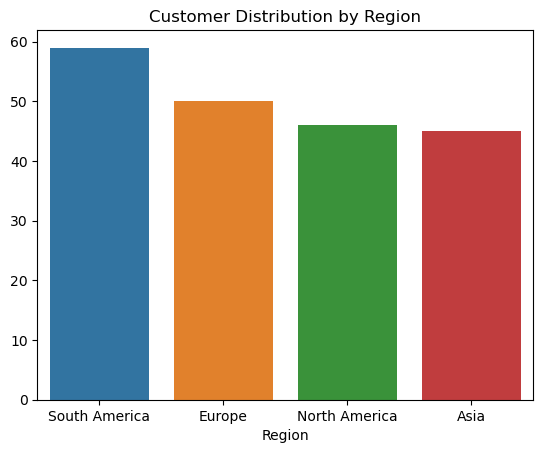

In [12]:
# Visualizations
sns.barplot(x=region_distribution.index, y=region_distribution.values)
plt.title("Customer Distribution by Region")
plt.show()

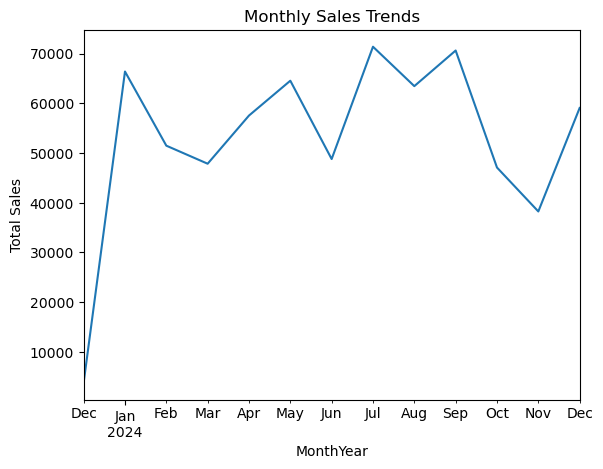

In [13]:
monthly_sales.plot(kind='line', title="Monthly Sales Trends")
plt.ylabel("Total Sales")
plt.show()